In [142]:
!pip install imblearn

In [143]:
!pip install xgboost

**Import Libraries and set up Notebook**

In [144]:
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

from sklearnex import patch_sklearn


# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=15,15 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16


# Data Understanding (Exploratory Data Analysis)

## About the data set

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

    1) ID number
    2) Diagnosis (M = malignant, B = benign)
    3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## Overview

In [145]:
df = pd.read_csv('data.csv')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [147]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [148]:
list(df.columns)

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [149]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,569.0,NaN,NaN,NaN,30371831.432337,125020585.612224,8670.0,869218.0,906024.0,8813129.0,911320502.0
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,569.0,NaN,NaN,NaN,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11
texture_mean,569.0,NaN,NaN,NaN,19.289649,4.301036,9.71,16.17,18.84,21.8,39.28
perimeter_mean,569.0,NaN,NaN,NaN,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5
area_mean,569.0,NaN,NaN,NaN,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,NaN,NaN,NaN,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,NaN,NaN,NaN,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,NaN,NaN,NaN,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,NaN,NaN,NaN,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012


In [150]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [151]:
df.replace("?",np.nan,inplace=True)

In [152]:
for column in df.columns:
    try:
        df[column]=df[column].astype(float)
    except:
        pass
    

In [153]:
# show the numeric characters
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


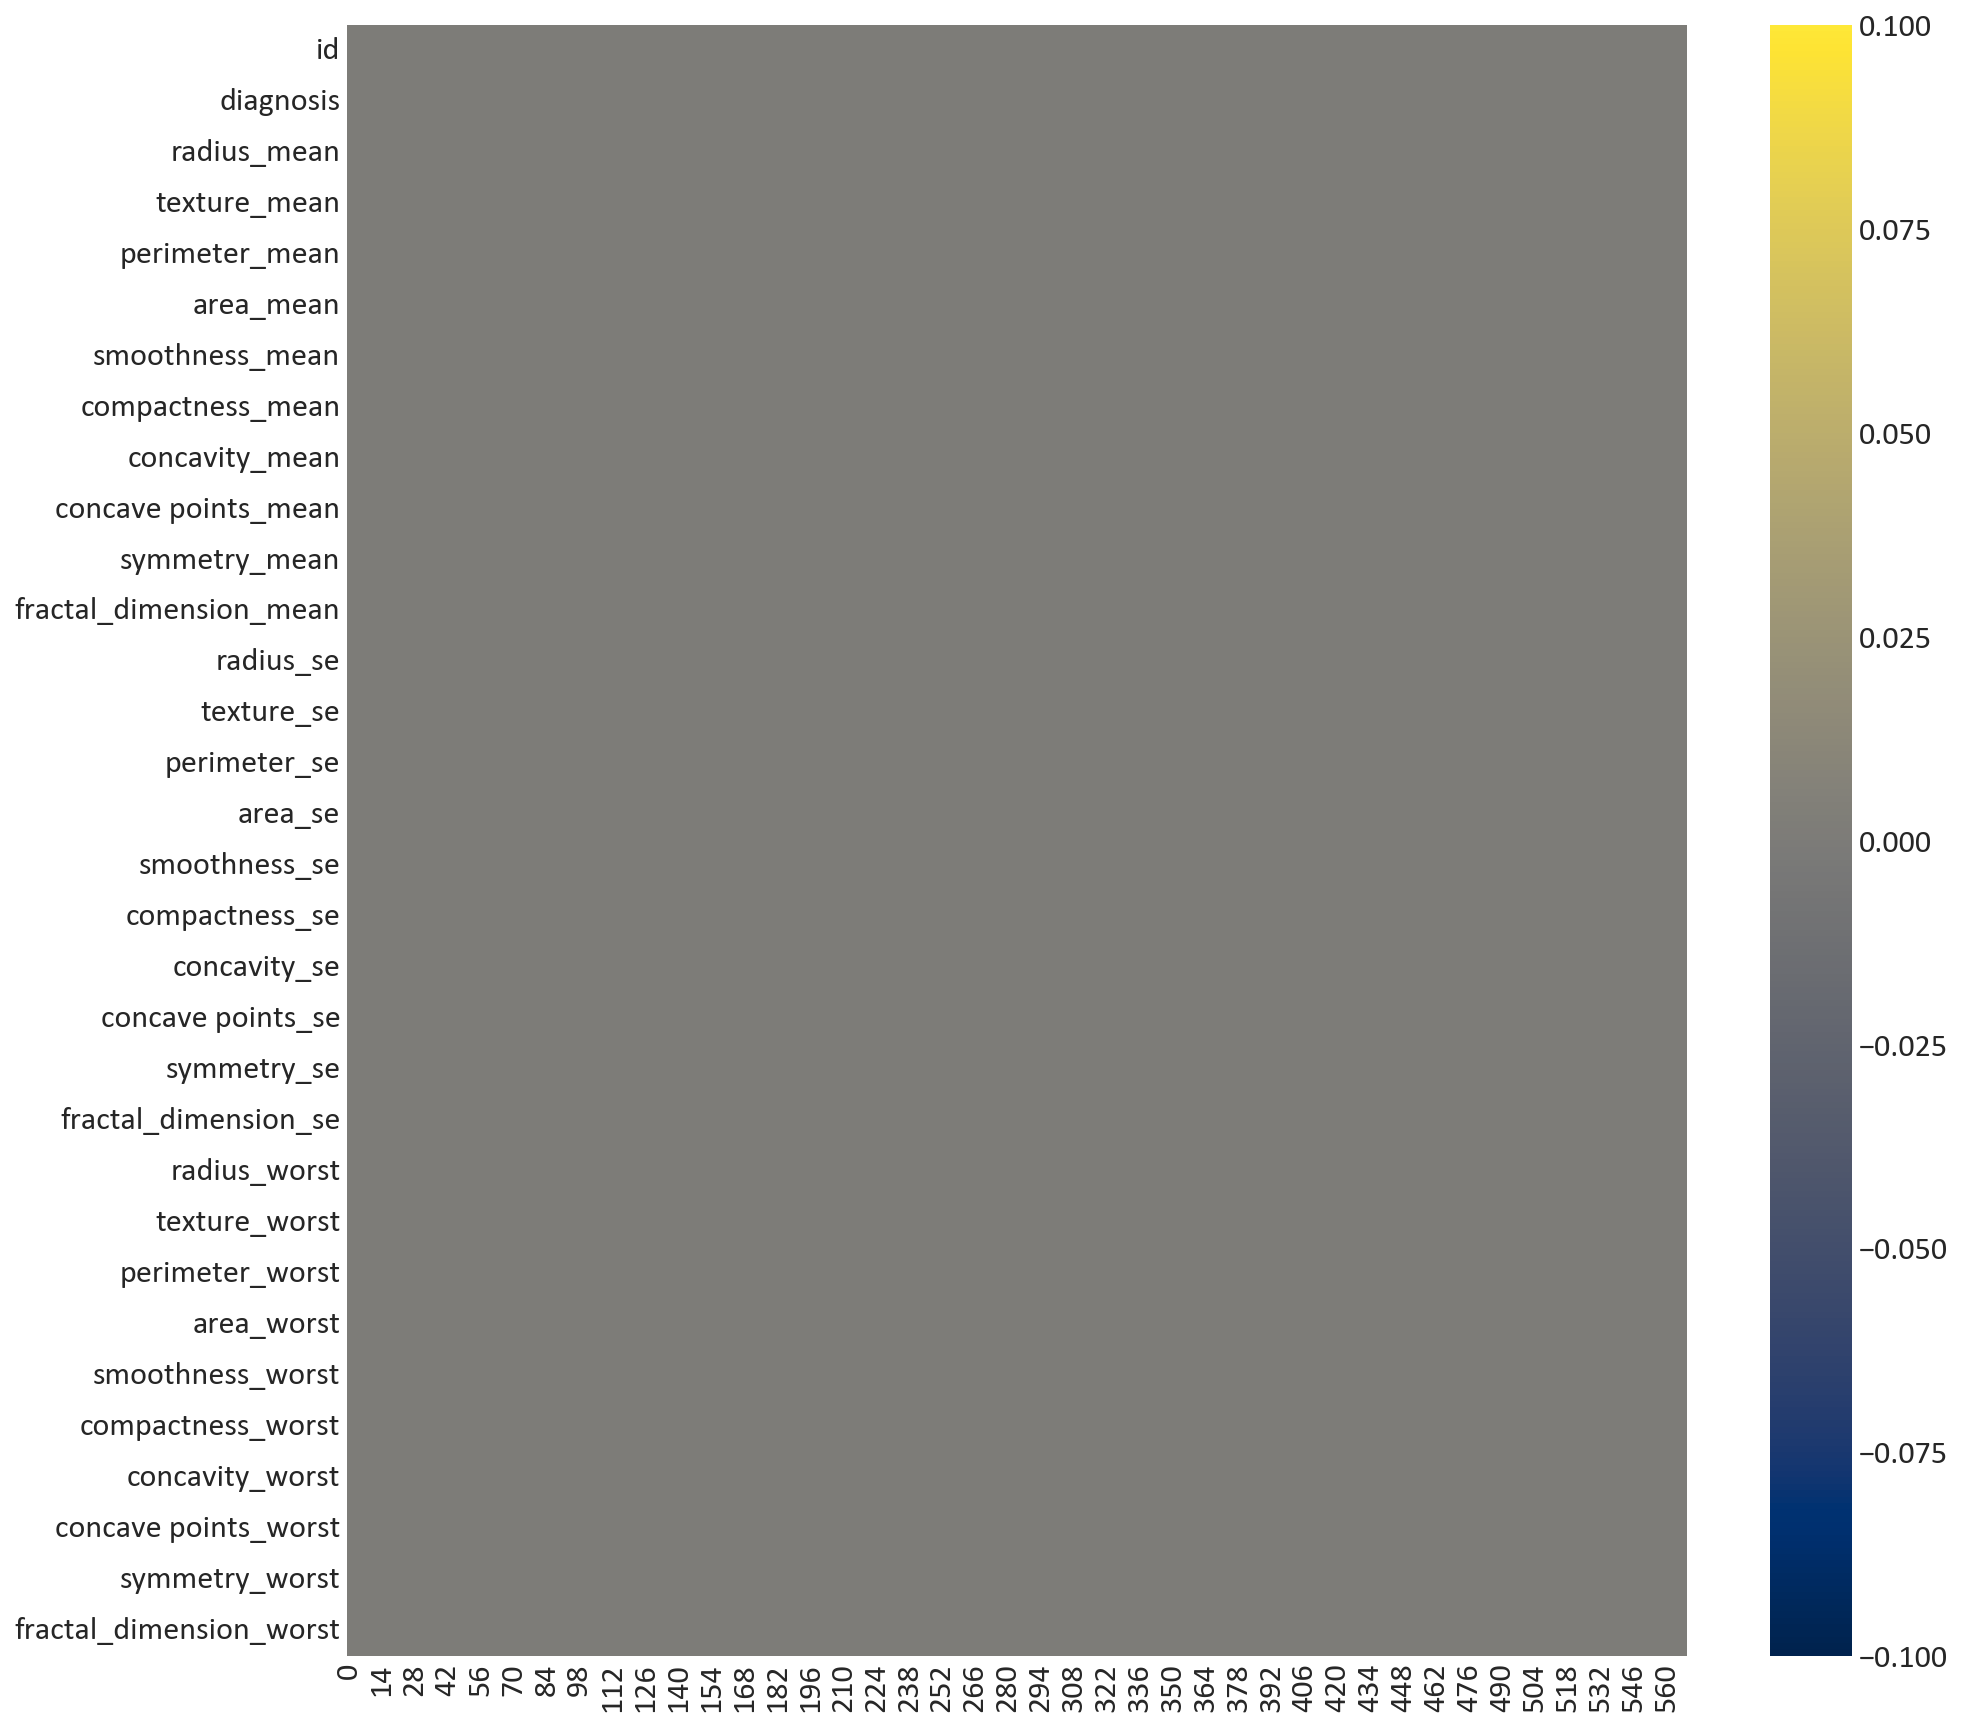

In [154]:
plt.figure(figsize=(15,15))
plot_kws={"s": 1}
sns.heatmap(df.isna().transpose(),
            cmap='cividis',
            linewidths=0.0,
           ).set_facecolor('white')

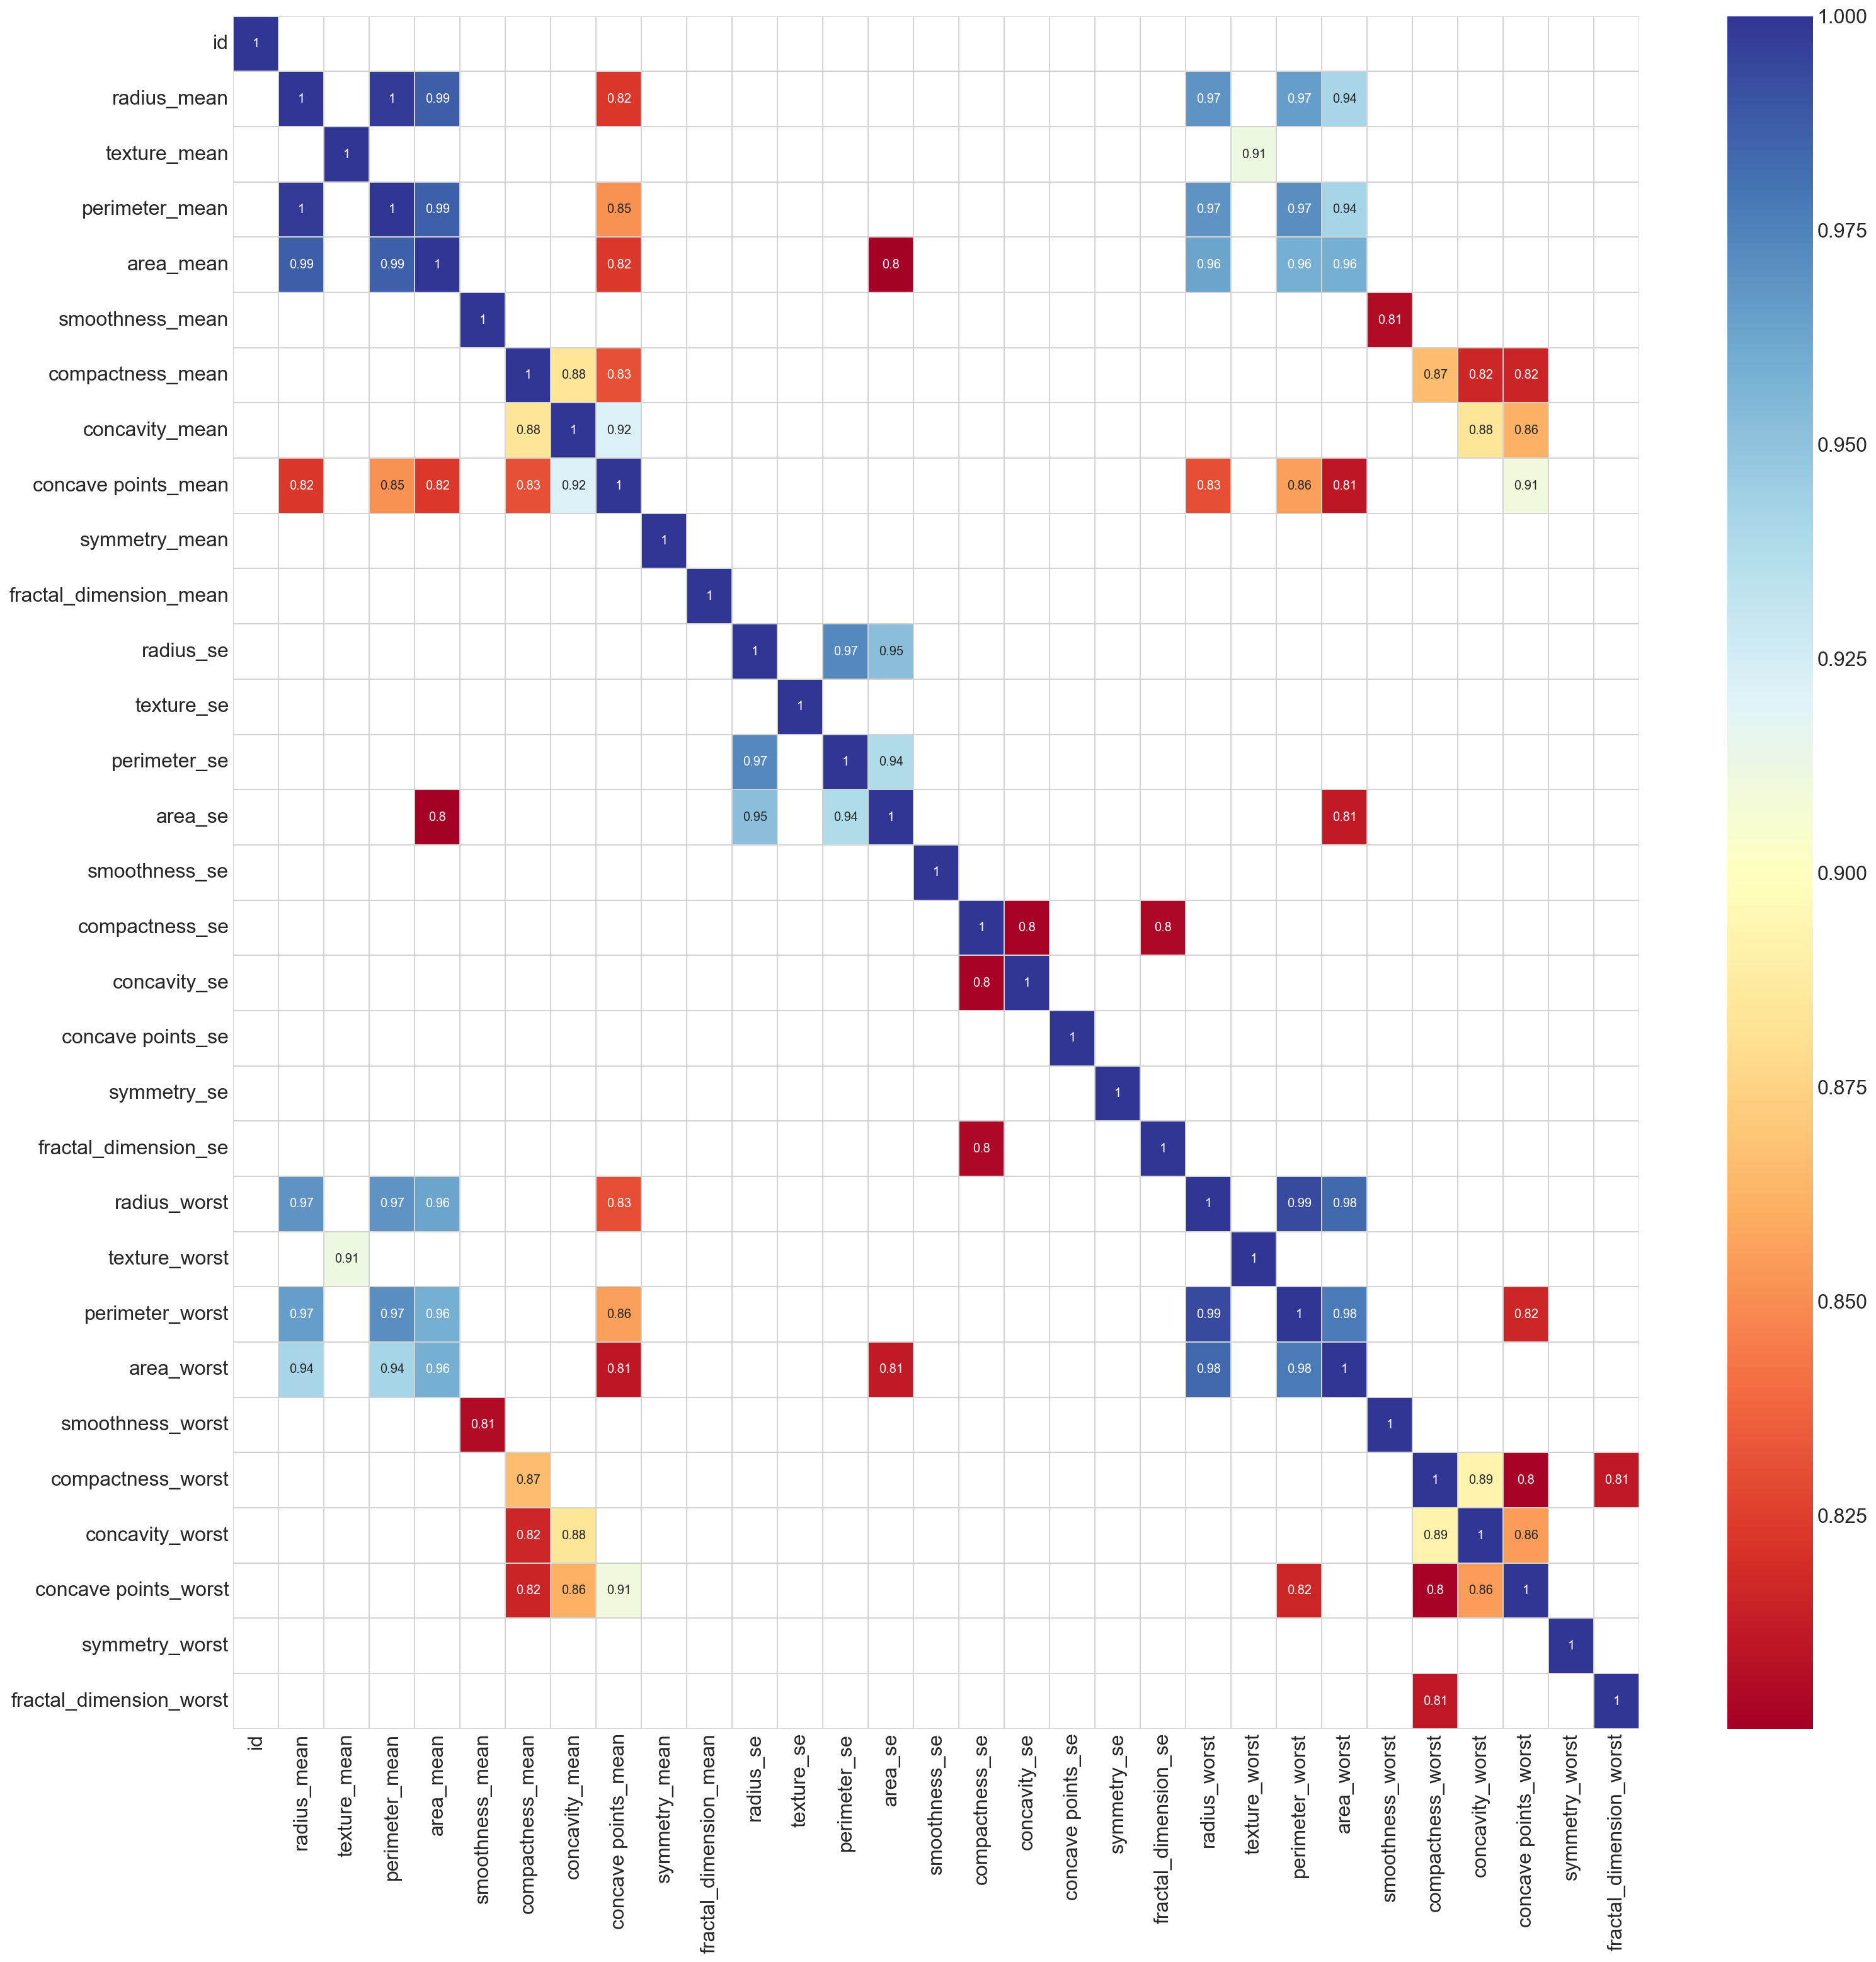

In [155]:
plt.figure(figsize=(25,25))
threshold = 0.80
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

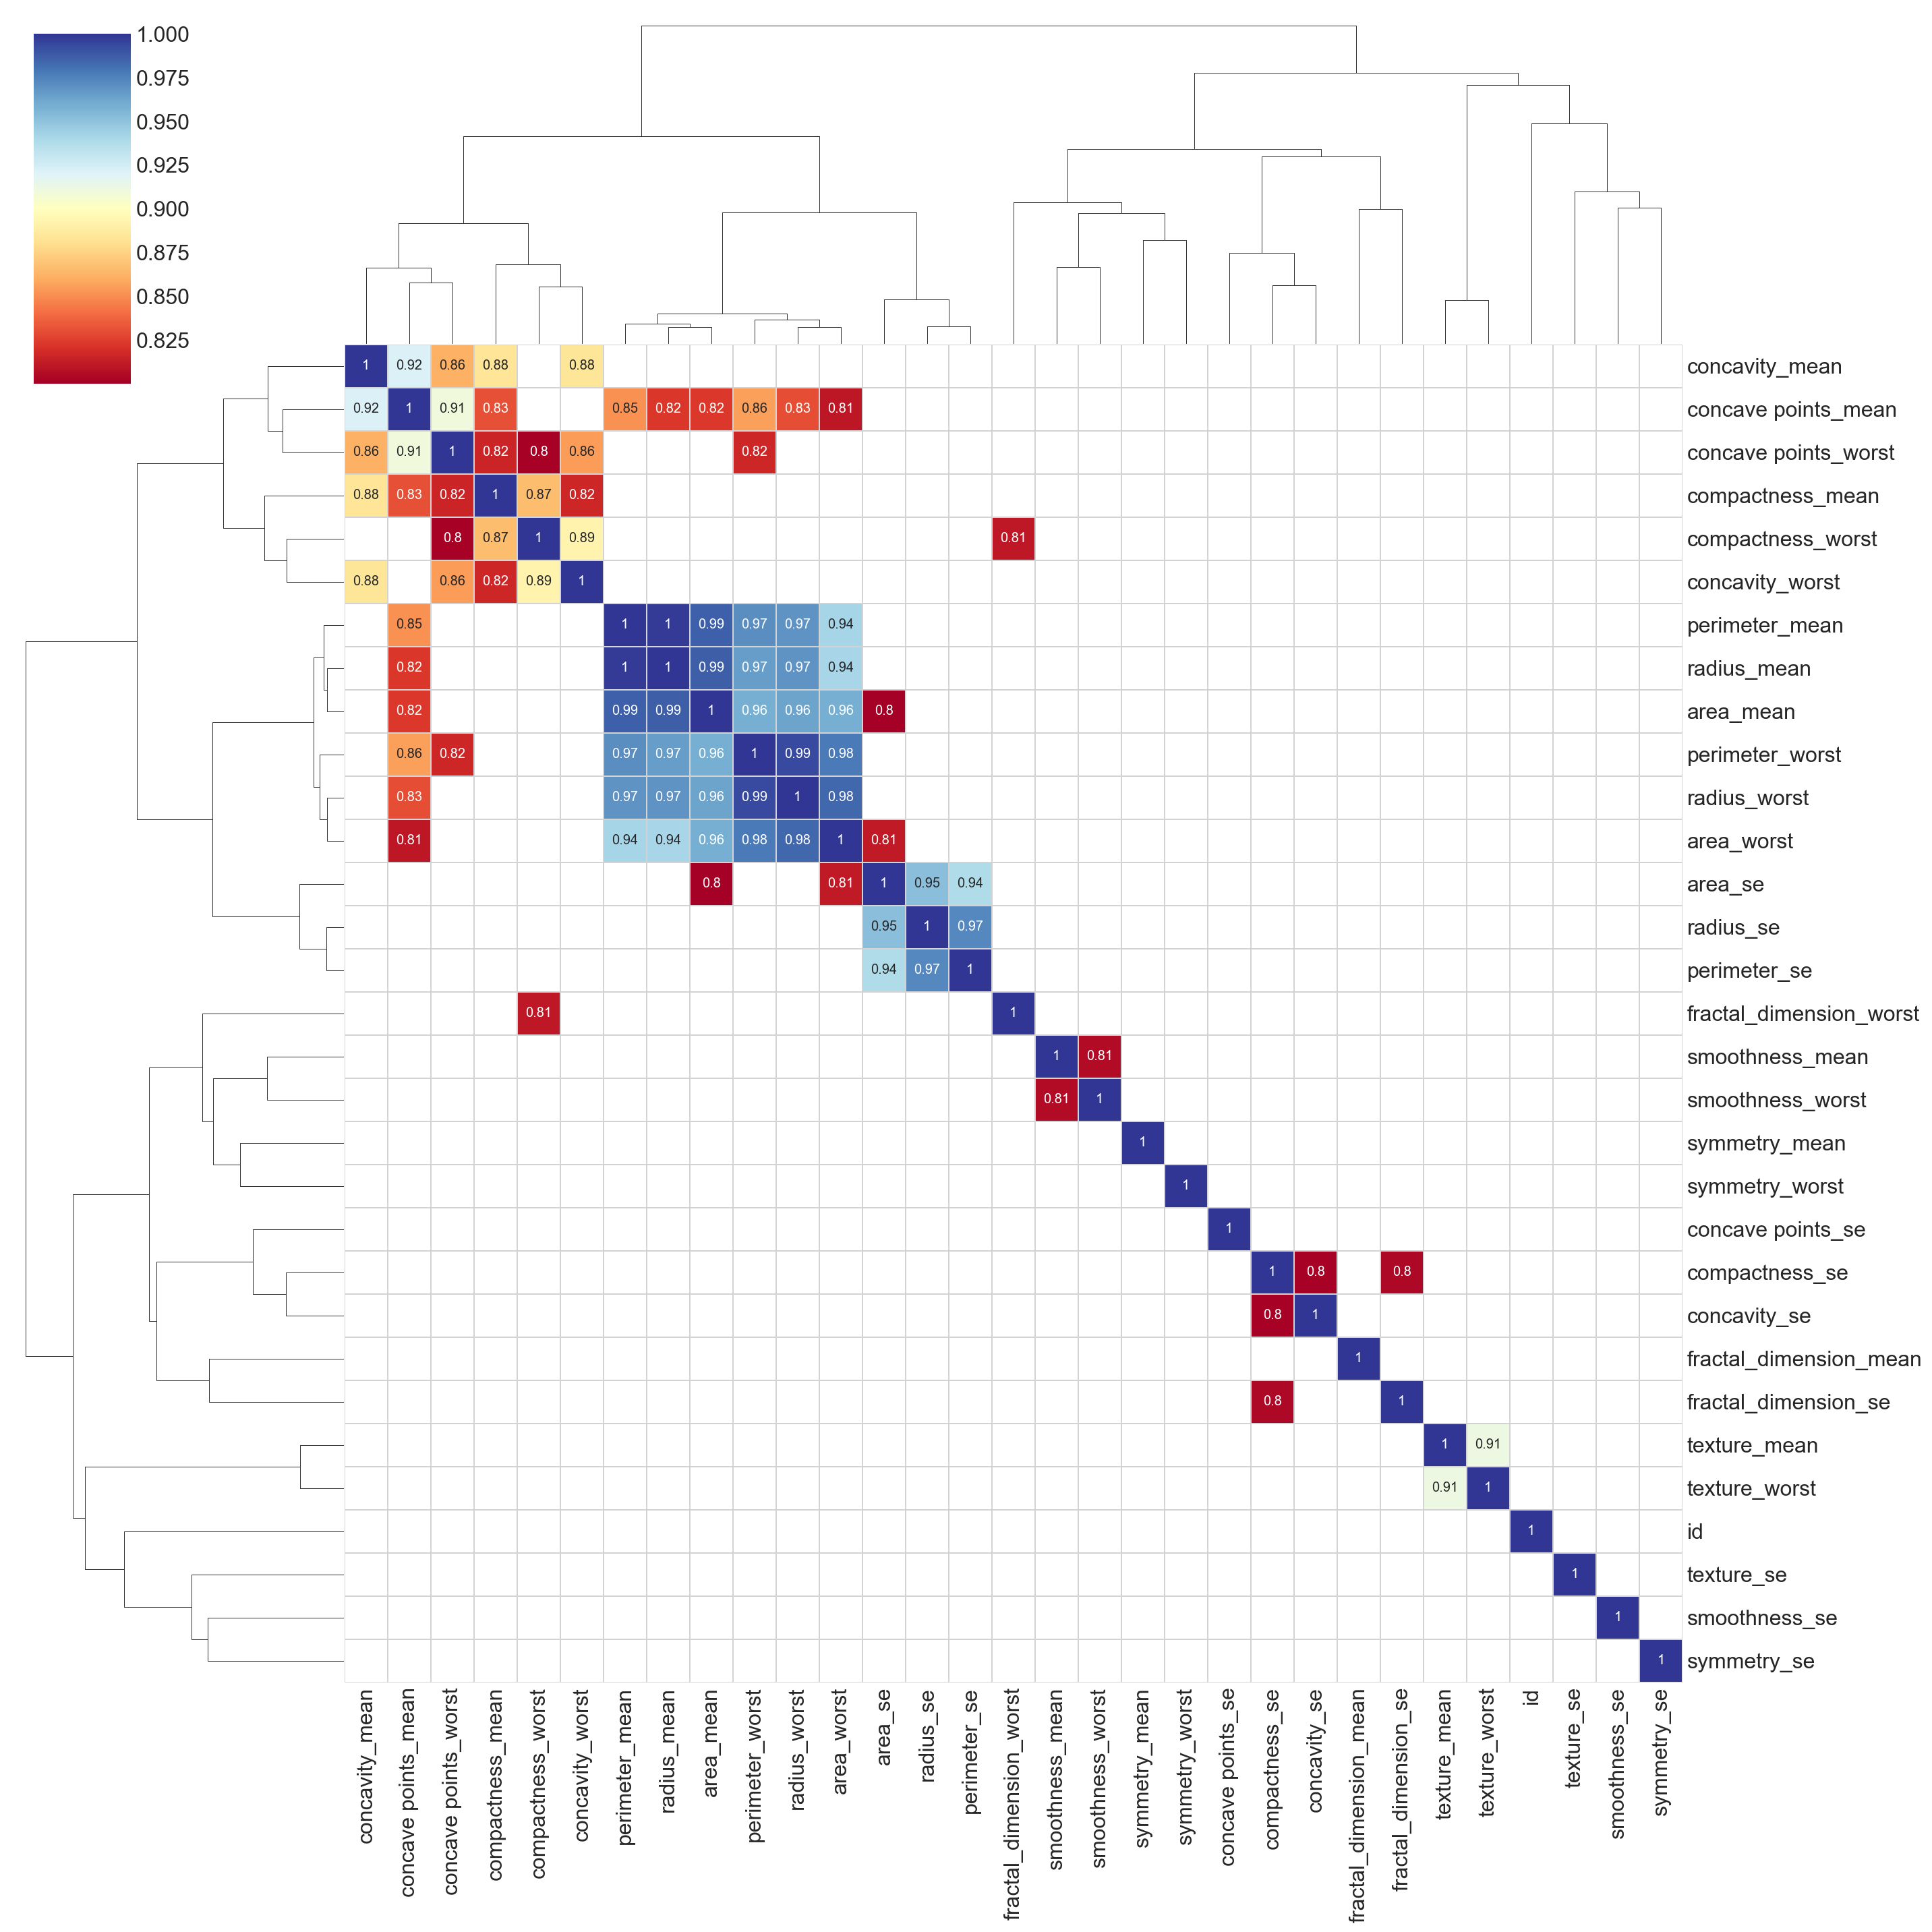

In [156]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=25,25 
threshold = 0.80
df_cluster2 = df.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()

plot_kws={"s": 1}
sns.clustermap(df_cluster2,
               cmap='RdYlBu',
               linewidths=0.1,
               annot=True,
               figsize=(20,20),
               mask=mask,
               linecolor='lightgray')

In [157]:
# %%time
# profile = ProfileReport(df,
#                         title="Post Block Assignment 1",
#                         dataset={"description": "This profiling report was generated for Carl Kirstein",
#                                  "copyright_holder": "Carl Kirstein",
#                                  "copyright_year": "2022",
#                                 },
#                         explorative=True,
#                        )
# profile

In [158]:
list(df)

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

## Descriptive Features

In [159]:
features = list(df.columns)

In [160]:
for feature in features:
    print(feature + " - " + str(len(df[df[feature].isna()])))

id - 0
diagnosis - 0
radius_mean - 0
texture_mean - 0
perimeter_mean - 0
area_mean - 0
smoothness_mean - 0
compactness_mean - 0
concavity_mean - 0
concave points_mean - 0
symmetry_mean - 0
fractal_dimension_mean - 0
radius_se - 0
texture_se - 0
perimeter_se - 0
area_se - 0
smoothness_se - 0
compactness_se - 0
concavity_se - 0
concave points_se - 0
symmetry_se - 0
fractal_dimension_se - 0
radius_worst - 0
texture_worst - 0
perimeter_worst - 0
area_worst - 0
smoothness_worst - 0
compactness_worst - 0
concavity_worst - 0
concave points_worst - 0
symmetry_worst - 0
fractal_dimension_worst - 0


## target label

In [161]:
df_group = df.groupby(['diagnosis'])
df_group.count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212


In [162]:
df[df['diagnosis'].isna()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


# Pre-processing and Feature Selection

## Manage Missing Values

In [163]:
# replace the missing numeric values with the mean
df_numeric.fillna(df_numeric.mean(),inplace=True)

for feature in features:
    try:
        df[feature].fillna(df[feature].mean(),inplace=True)
    except:
        try:
            df[feature].fillna(df[feature].mode(),inplace=True)
        except:
            pass
    

In [164]:
# show the categorical features
df_cat = df.select_dtypes(exclude=[np.number])

In [165]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,569.0,NaN,NaN,NaN,30371831.432337,125020585.612224,8670.0,869218.0,906024.0,8813129.0,911320502.0
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,569.0,NaN,NaN,NaN,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11
texture_mean,569.0,NaN,NaN,NaN,19.289649,4.301036,9.71,16.17,18.84,21.8,39.28
perimeter_mean,569.0,NaN,NaN,NaN,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5
area_mean,569.0,NaN,NaN,NaN,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,NaN,NaN,NaN,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,NaN,NaN,NaN,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,NaN,NaN,NaN,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,NaN,NaN,NaN,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012


## Manage outliers

In [166]:
df['texture_mean'][df['texture_mean']<0] = -df['texture_mean'][df['texture_mean']<0]

In [167]:
# Clamp extreme Values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

# if the distance from median to 3rd quartile is less than 3rd quartile to maximum, then clamp to 99th percentile

DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.75)))
        print('median = '+str(df_numeric[feature].median()))
        print((df_numeric[feature].max-df[feature].quantile(0.75))>(df[feature].quantile(0.75)-df_numeric[feature].median()))
        print('----------------------------------------------------')
    # if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
    if (df[feature].max()-df[feature].quantile(0.75))>(df[feature].quantile(0.75)-df[feature].median()) and df[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.99), df[feature], df[feature].quantile(0.99))

## Drop irrelevant or excess features

In [168]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [169]:
list_drop = ['id',
#              'gender',
             'area_mean',
             'radius_mean',
             'perimeter_worst',
             'radius_worst',
             'area_worst',
             'radius_se',
             'perimeter_se',
             'concave points_mean',
             'compactness_worst',
             'concave points_se',
             'concavity_se',
             'concavity_worst',
             'fractal_dimension_worst',
             'smoothness_mean',
             'symmetry_mean',
            ]
df.drop(list_drop,axis=1,inplace=True)

## Encode categorical features

The categorical features must be encoded to ensure that the models can interpret them. One-hot encoding is used since none of the categorical features are ordinal.  

In [170]:
df['diagnosis'].replace(["B", "M"], [0,1], inplace = True)


In [171]:
df_numeric = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

In [172]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
diagnosis,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
texture_mean,10.380000,17.770000,21.250000,20.380000,14.340000,15.700000,19.980000,20.830000,21.820000,24.040000
perimeter_mean,122.800000,132.900000,130.000000,77.580000,135.100000,82.570000,119.600000,90.200000,87.500000,83.970000
compactness_mean,0.277600,0.078640,0.159900,0.283900,0.132800,0.170000,0.109000,0.164500,0.193200,0.239600
concavity_mean,0.300100,0.086900,0.197400,0.241400,0.198000,0.157800,0.112700,0.093660,0.185900,0.227300
fractal_dimension_mean,0.078710,0.056670,0.059990,0.097440,0.058830,0.076130,0.057420,0.074510,0.073890,0.082430
texture_se,0.905300,0.733900,0.786900,1.156000,0.781300,0.890200,0.773200,1.377000,1.002000,1.599000
area_se,153.400000,74.080000,94.030000,27.230000,94.440000,27.190000,53.910000,50.960000,24.320000,23.940000
smoothness_se,0.006399,0.005225,0.006150,0.009110,0.011490,0.007510,0.004314,0.008805,0.005731,0.007149
compactness_se,0.049040,0.013080,0.040060,0.074580,0.024610,0.033450,0.013820,0.030290,0.035020,0.072170


## Best Features

This section does an analysis (univariate statistical tests) to determine which features best predict the target feature. 

[Text(0.5, 1.0, 'Best Features')]

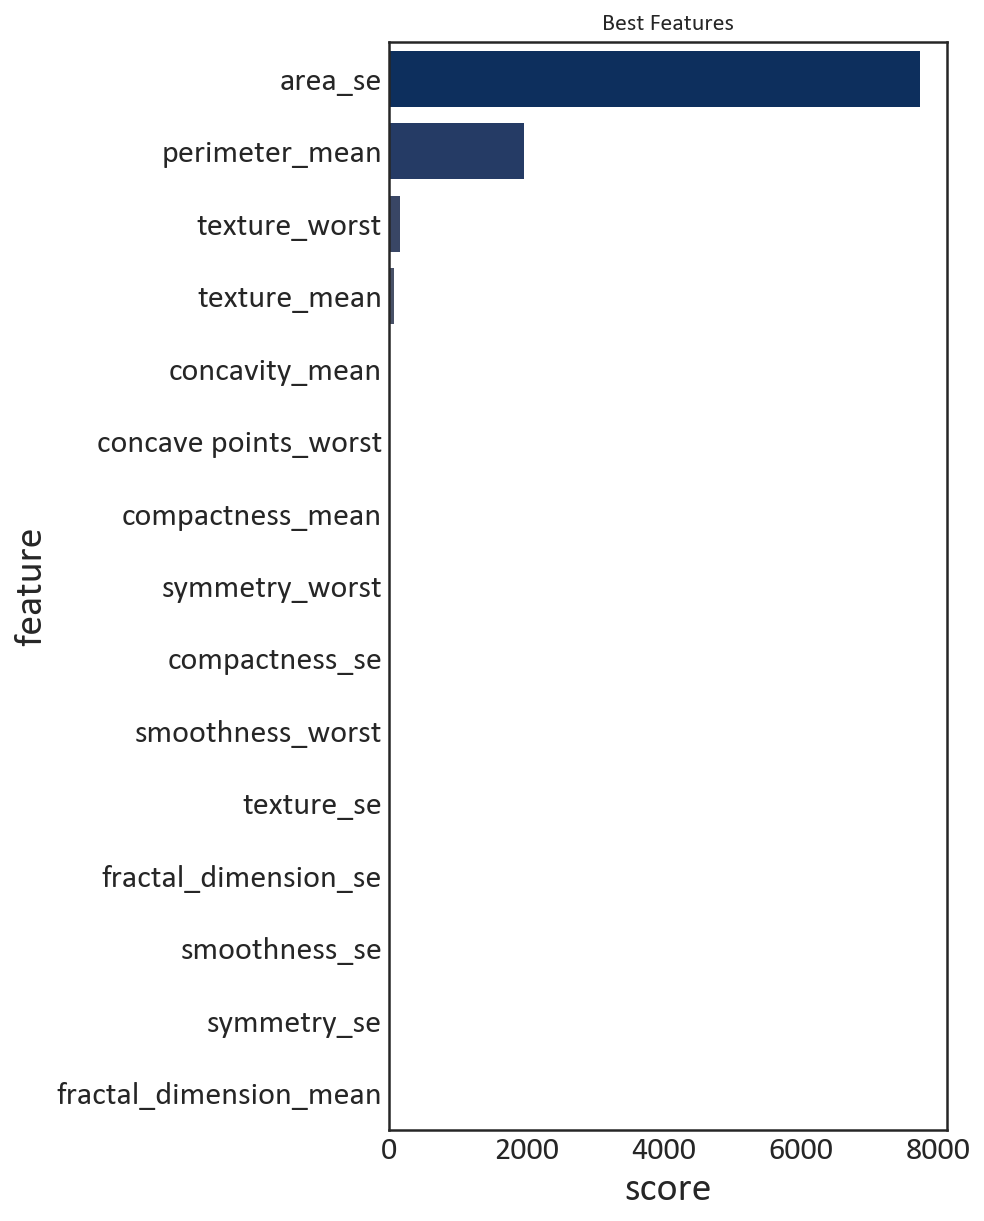

In [173]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=False,inplace=True)

plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=5,10
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16
plt.rcParams['legend.frameon']=True


sns.barplot(data = feature_score, 
            x='score', 
            y='feature',
            palette='cividis',
           ).set(title='Best Features')

Drop low importance features:

# Modelling


## Prep for Modelling

### Oversampling and Splitting

In [174]:
# import library
from imblearn.over_sampling import SMOTE, SVMSMOTE,RandomOverSampler
oversamp = SMOTE(n_jobs=-1)
# oversamp = RandomOverSampler(random_state=0)

In [175]:
X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

feature_names = list(X.columns)

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y
                                                   )
X_train,y_train = oversamp.fit_resample(X_train, y_train)

### Normalize features
a minmax scaler is used on the features to put them all in the same order of size.

In [177]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Import Metrics

Imports the libraries that will be used to evaluate the models later on

In [178]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score, plot_confusion_matrix,matthews_corrcoef
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','time to train','time to predict','total time'])


## kNN


In [179]:
%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 0 ns
Wall time: 5.98 ms


In [180]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 92.98%
Recall: 92.98%
Precision: 93.11%
F1-Score: 93.01%
MCC: 85.13%
ROC AUC score: 96.63%
time to train: 0.00 s
time to predict: 0.00 s
total: 0.01 s


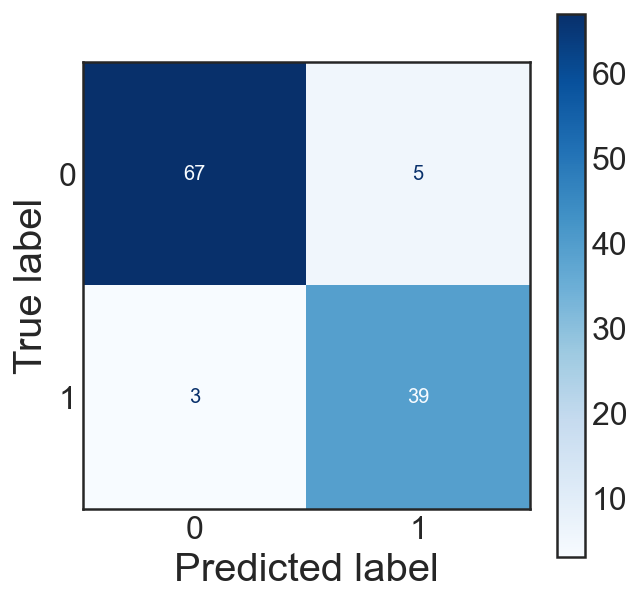

In [181]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [182]:
accuracy = []
recall = []
precision = []
f1s = []
MCC = []
ROC_AUC = []
for nr in range(1,41):
    model = KNeighborsClassifier(n_neighbors=nr).fit(X_train,y_train)
    y_predictions = model.predict(X_test) # These are the predictions from the test data.
    accuracy.append(accuracy_score(y_test, y_predictions))
    recall.append(recall_score(y_test, y_predictions, average='weighted'))
    precision.append(precision_score(y_test, y_predictions, average='weighted'))
    f1s.append(f1_score(y_test, y_predictions, average='weighted'))
    MCC.append(matthews_corrcoef(y_test, y_predictions))
    ROC_AUC.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted'))
    


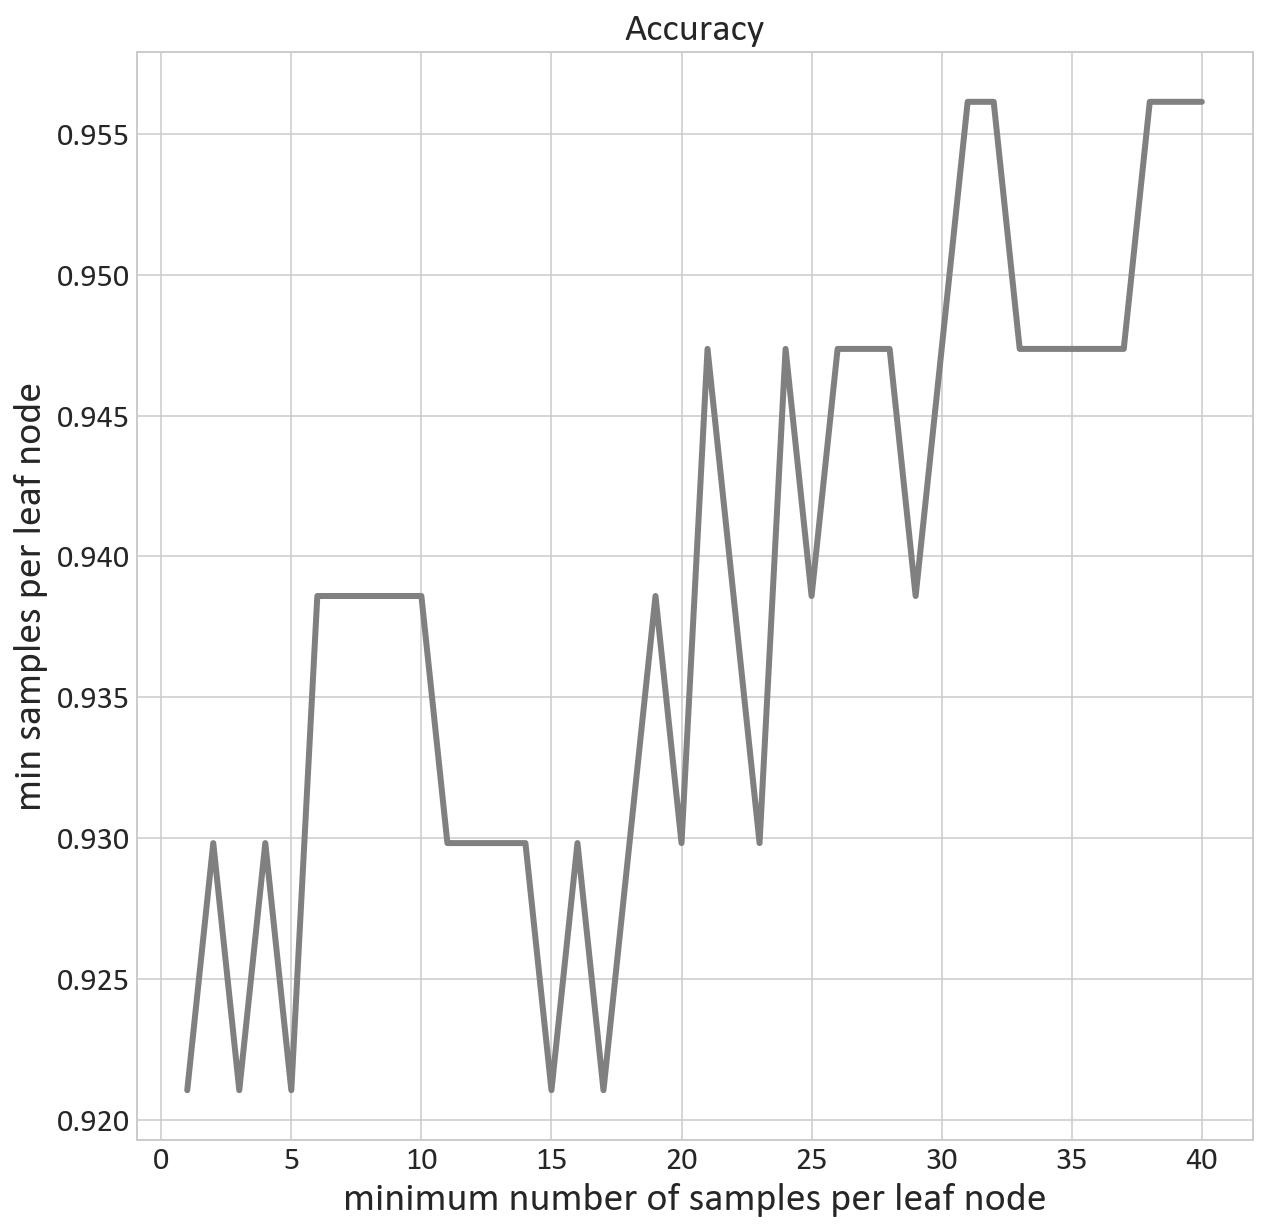

In [183]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=10,10 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size']=16
# plt.rcParams['axes.labelsize']=20
# plt.rcParams['xtick.labelsize']=16
# plt.rcParams['ytick.labelsize']=16
# plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Accuracy')
plt.ylabel('min samples per leaf node')
plt.xlabel('minimum number of samples per leaf node')

f = sns.lineplot(x=range(1,41),
             y=accuracy,
             linewidth=3,
             color='gray',
             ax=ax,
                )



## Decision Tree


In [184]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 15.6 ms
Wall time: 3.99 ms


In [185]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 92.11%
Recall: 92.11%
Precision: 92.16%
F1-Score: 92.12%
MCC: 83.13%
ROC AUC score: 91.77%
time to train: 0.00 s
time to predict: 0.00 s
total: 0.00 s


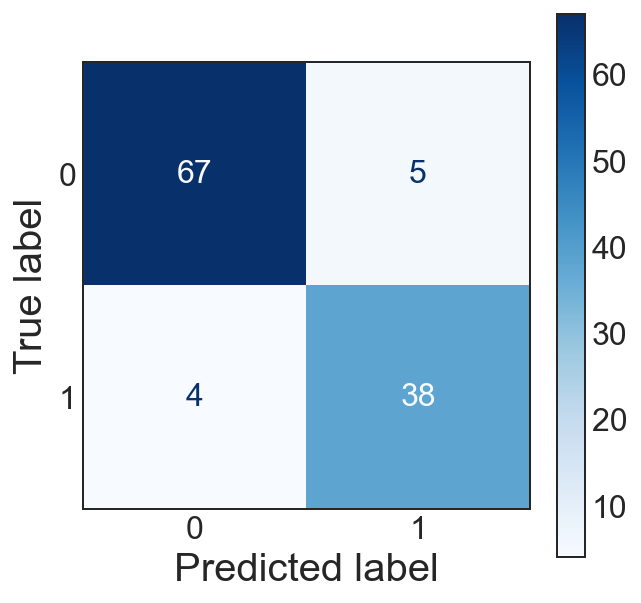

In [186]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

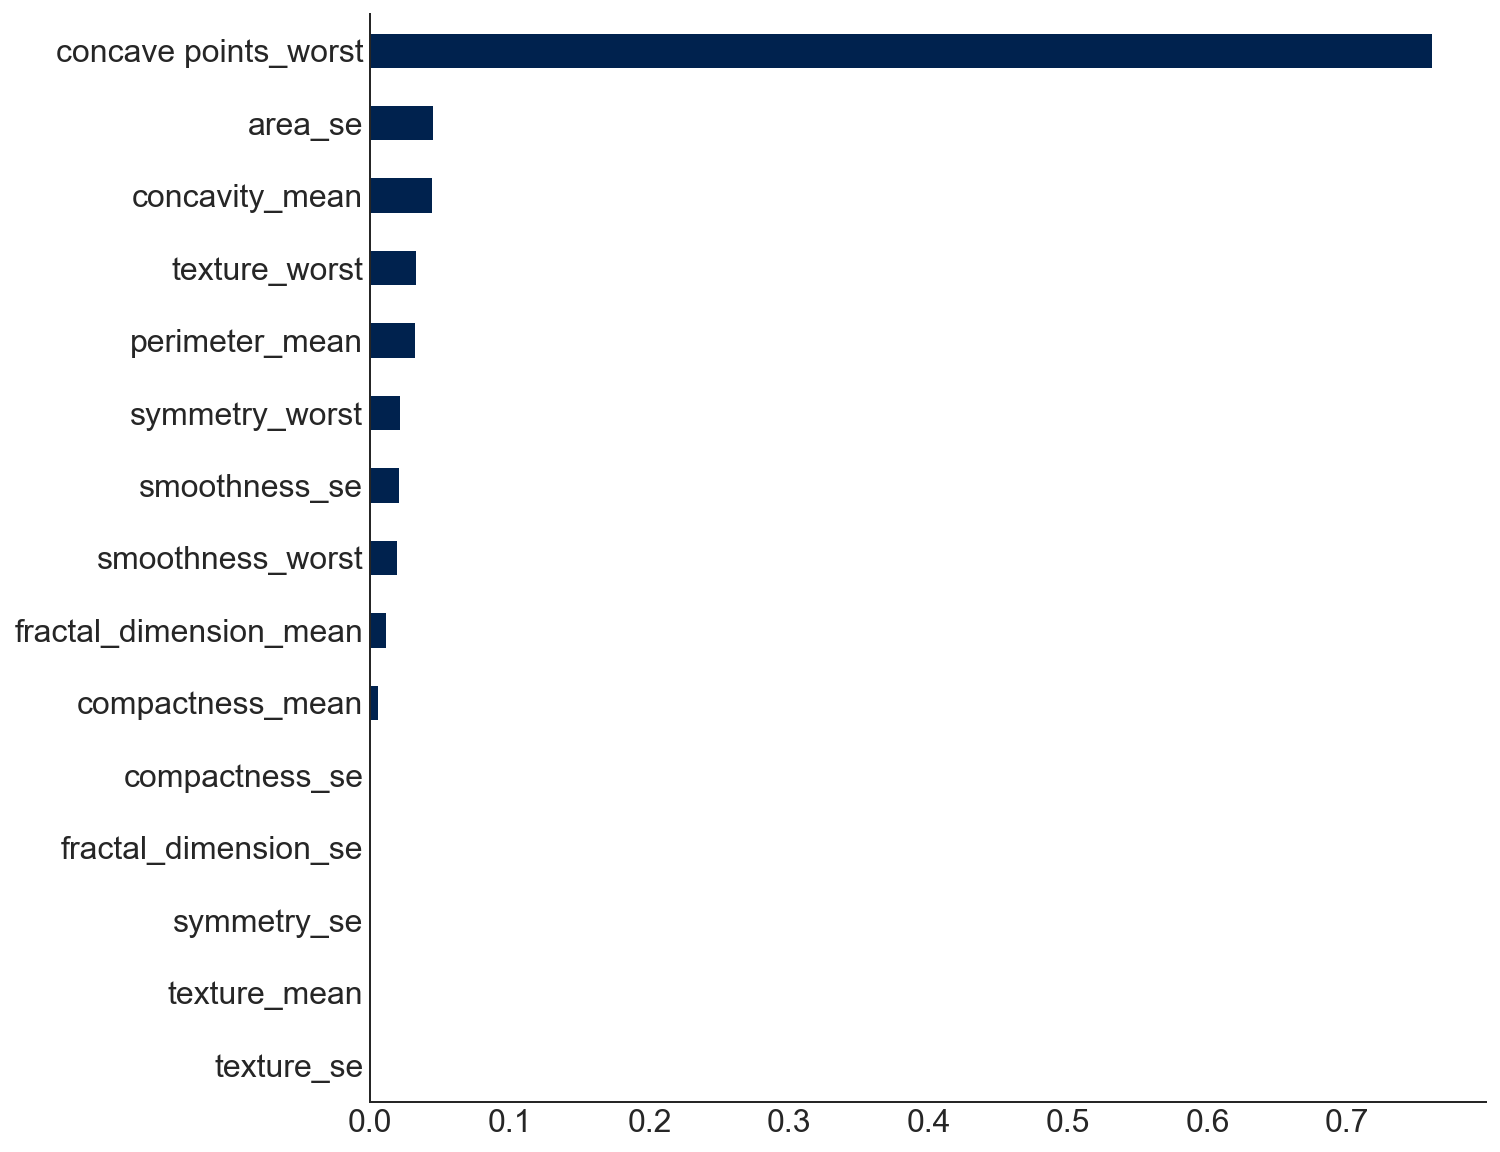

In [187]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
# feat_importances = pd.Series(model.feature_importances_,)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh',cmap='cividis').invert_yaxis()
sns.despine()
plt.show()

In [188]:
from sklearn import tree

In [189]:
dtree = model

## Pruned Decision Tree

In [190]:
feat_importances.nlargest(20)

concave points_worst      0.761720
area_se                   0.045613
concavity_mean            0.044612
texture_worst             0.033618
perimeter_mean            0.032440
symmetry_worst            0.022272
smoothness_se             0.021592
smoothness_worst          0.019961
fractal_dimension_mean    0.012030
compactness_mean          0.006140
compactness_se            0.000000
fractal_dimension_se      0.000000
symmetry_se               0.000000
texture_mean              0.000000
texture_se                0.000000
dtype: float64

In [191]:
pruned_features = pd.DataFrame(feat_importances.nlargest(20).reset_index())
pruned_features.columns = ['index','importance']
pruned_features = list(pruned_features['index'][pruned_features['importance']<0.04])
pruned_features
    

['texture_worst',
 'perimeter_mean',
 'symmetry_worst',
 'smoothness_se',
 'smoothness_worst',
 'fractal_dimension_mean',
 'compactness_mean',
 'compactness_se',
 'fractal_dimension_se',
 'symmetry_se',
 'texture_mean',
 'texture_se']

In [192]:
df.drop(pruned_features,axis=1,inplace=True)

In [193]:
X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

feature_names = list(X.columns)

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)
X_train,y_train = oversamp.fit_resample(X_train, y_train)

### Normalize features
a minmax scaler is used on the features to put them all in the same order of size.

In [195]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [196]:
accuracy = []
recall = []
precision = []
f1s = []
MCC = []
ROC_AUC = []
for nr in range(1,41):
    model = DecisionTreeClassifier(min_samples_leaf=nr
                                  ).fit(X_train,y_train)
    y_predictions = model.predict(X_test) # These are the predictions from the test data.
    accuracy.append(accuracy_score(y_test, y_predictions))
    recall.append(recall_score(y_test, y_predictions, average='weighted'))
    precision.append(precision_score(y_test, y_predictions, average='weighted'))
    f1s.append(f1_score(y_test, y_predictions, average='weighted'))
    MCC.append(matthews_corrcoef(y_test, y_predictions))
    ROC_AUC.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted'))
    

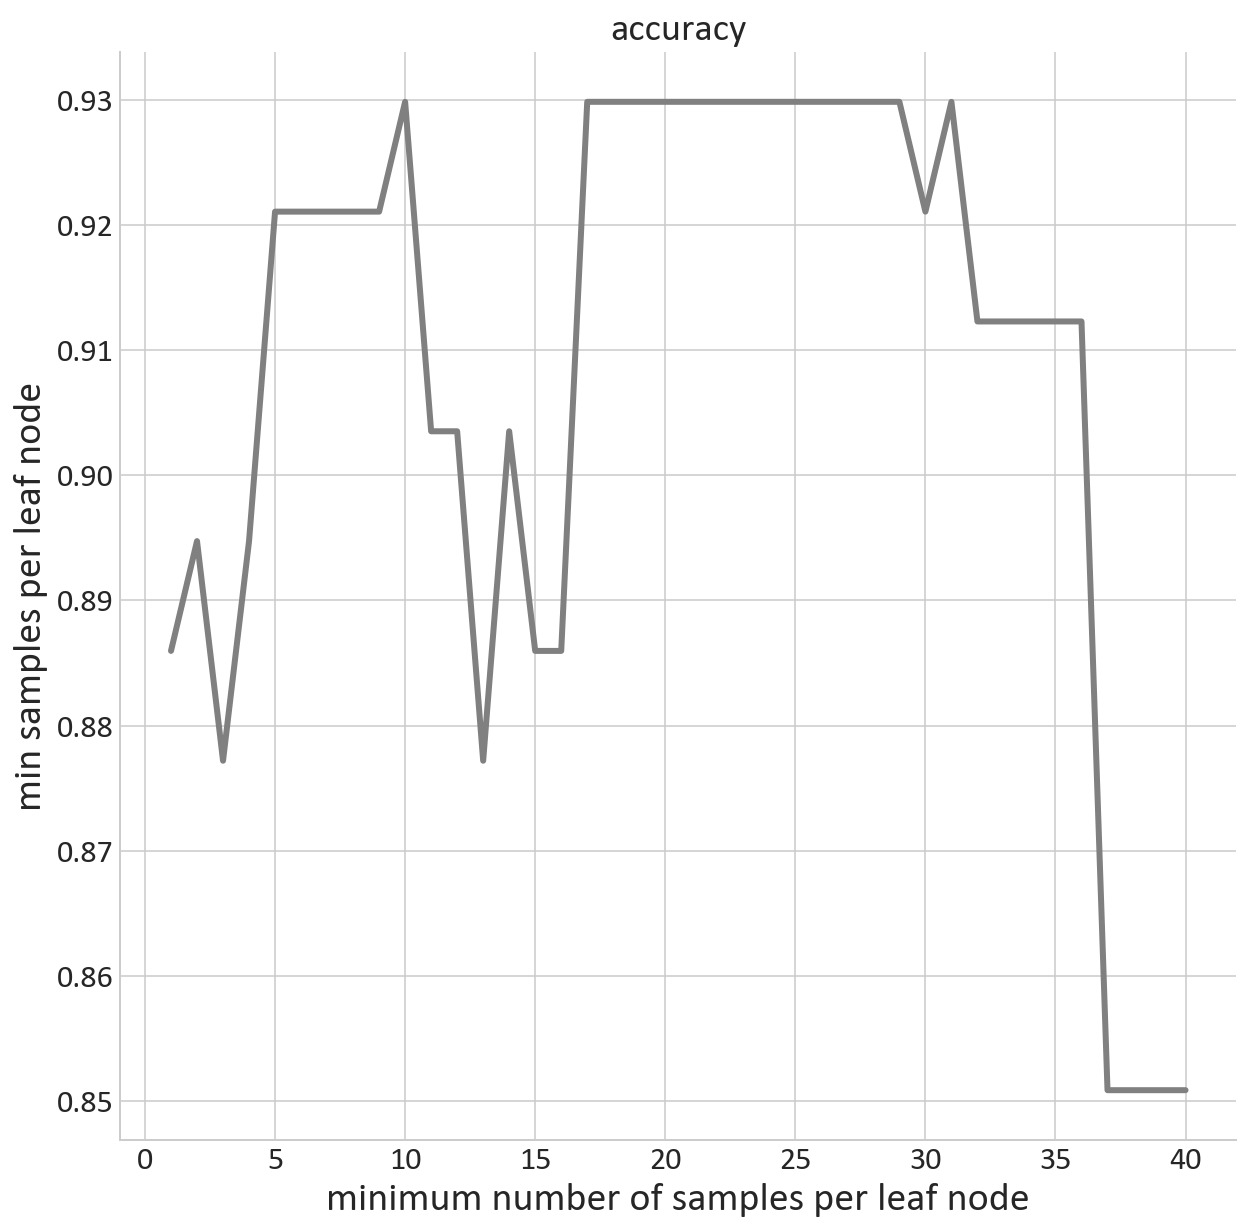

In [197]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=10,10 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size']=16

fig,ax = plt.subplots()
plt.title('accuracy')
plt.ylabel('min samples per leaf node')
plt.xlabel('minimum number of samples per leaf node')

f = sns.lineplot(x=range(1,41),
             y=accuracy,
             linewidth=3,
             color='gray',
             ax=ax,
                )


sns.despine()

In [198]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier(min_samples_leaf=28).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: total: 0 ns
Wall time: 1.98 ms


In [199]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
MCC = matthews_corrcoef(y_test, y_predictions)
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("MCC: "+ "{:.2%}".format(MCC))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,MCC,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 92.98%
Recall: 92.98%
Precision: 93.11%
F1-Score: 93.01%
MCC: 85.13%
ROC AUC score: 94.06%
time to train: 0.00 s
time to predict: 0.00 s
total: 0.00 s


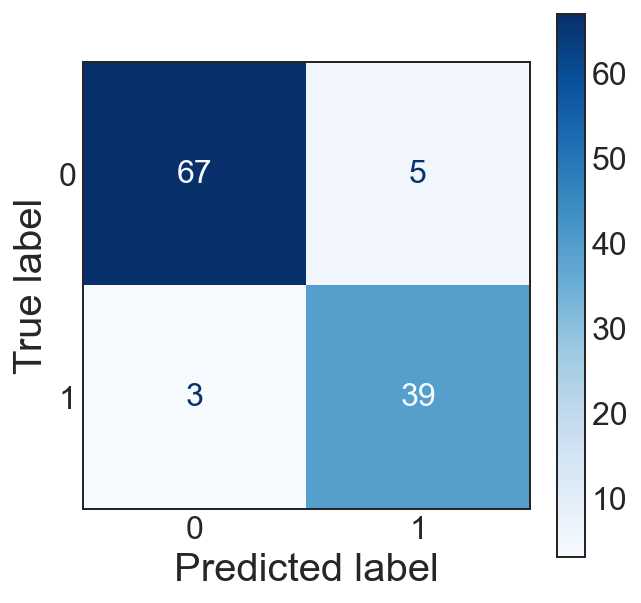

In [200]:
plt.rcParams['figure.figsize']=5,5 
sns.set_style("white")
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Logistic Regression Model:

1.This technique is widely used in medical field where dealing with binary classification problems.
2.Firstly we will run over all the mean features against our target feature.
3.We will use the features for our model based on the features that showed correlation in our heatmap.

In [201]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

In [202]:
from sklearn.linear_model import LogisticRegression

# Initiating the model:
lr = LogisticRegression()

lr = lr.fit(X_train, y_train)

predicted = lr.predict(X_test)

acc_test = metrics.accuracy_score(y_test, predicted)

print ('The accuracy on test data is %s' % (round(acc_test,2)))

The accuracy on test data is 0.93


# SVM:

In [203]:
# Importing the model:
from sklearn import svm

# Initiating the model:
svm = svm.SVC()

svm = svm.fit(X_train, y_train)

predicted = svm.predict(X_test)

acc_test = metrics.accuracy_score(y_test, predicted)

print ('The accuracy on test data is %s' % (round(acc_test,2)))

The accuracy on test data is 0.92


# Perceptron:

Perceptron is binary linear classification algortithm that purely decides based on the input (vector of numbers) if it belongs to specific class or not.

In [204]:
# Importing the model:
from sklearn.linear_model import Perceptron

# Initiating the model:
pct = Perceptron()

pct = pct.fit(X_train, y_train)

predicted = pct.predict(X_test)

acc_test = metrics.accuracy_score(y_test, predicted)

print ('The accuracy on test data is %s' % (round(acc_test,2)))

The accuracy on test data is 0.95


# Random Forest Model:

In [205]:
from sklearn.ensemble import RandomForestClassifier

# Initiating the model:
rf = RandomForestClassifier(n_estimators=18)

rf = rf.fit(X_train, y_train)

predicted = rf.predict(X_test)

acc_test = metrics.accuracy_score(y_test, predicted)

print ('The accuracy on test data is %s' % (round(acc_test,2)))

The accuracy on test data is 0.92


# Naive Bayes:

In [206]:
from sklearn.naive_bayes import GaussianNB

# Initiating the model:
nb = GaussianNB()

nb = nb.fit(X_train, y_train)

predicted = nb.predict(X_test)

acc_test = metrics.accuracy_score(y_test, predicted)

print ('The accuracy on test data is %s' % (acc_test))

The accuracy on test data is 0.9298245614035088


# Stochastic Gradient Descent

In [207]:
from sklearn.linear_model import SGDClassifier
# Initiating the model:
sgd =  SGDClassifier()

sgd = sgd.fit(X_train, y_train)

predicted = sgd.predict(X_test)

acc_test = metrics.accuracy_score(y_test, predicted)

print ('The accuracy on test data is %s' % (round(acc_test,2)))

The accuracy on test data is 0.93


# Gradient Boosting Classifier

In [208]:
from sklearn.ensemble import GradientBoostingClassifier
# Initiating the model:
gbc =  GradientBoostingClassifier()

gbc = gbc.fit(X_train, y_train)

predicted = gbc.predict(X_test)

acc_test = metrics.accuracy_score(y_test, predicted)

print ('The accuracy on test data is %s' % (round(acc_test,2)))

The accuracy on test data is 0.92


# Extremely Random Trees

In [209]:
from sklearn.ensemble import ExtraTreesClassifier
ert =  ExtraTreesClassifier()

ert = ert.fit(X_train, y_train)

predicted = ert.predict(X_test)

acc_test = metrics.accuracy_score(y_test, predicted)

print ('The accuracy on test data is %s' % (round(acc_test,2)))

The accuracy on test data is 0.91


# XGBoost Classifier

In [210]:
from xgboost import XGBClassifier
xg =  XGBClassifier()

xg = xg.fit(X_train, y_train)

predicted = xg.predict(X_test)

acc_test = metrics.accuracy_score(y_test, predicted)

print ('The accuracy on test data is %s' % (round(acc_test,2)))

The accuracy on test data is 0.93
